## Import pro clustering

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [44]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

value_counts = X[X['smoking_history'] != 'No Info']['smoking_history'].value_counts()
total_count = value_counts.sum()
distribution = (X['smoking_history'].value_counts() / total_count).drop('No Info')
random= np.random.choice(distribution.index,X[X['smoking_history'] == 'No Info'].shape[0] ,p=distribution.values)

X['smoking_history'].loc[X['smoking_history'] == 'No Info'] = random


X = X.drop(X[X['gender'] == 'Other'].index)
X = pd.get_dummies(X, columns=['gender'])
X = pd.get_dummies(X, columns=['smoking_history'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
X.describe() #tabulka pro kontrolu min a max value 

C:\Users\cervi\AppData\Local\Temp\ipykernel_15148\484454644.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X['smoking_history'].loc[X['smoking_history'] == 'No Info'] = random
C:\Users\cervi\AppData\Local\Temp\ipykernel_15148\484454644.

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,0.523124,0.074863,0.039427,0.202040,0.368642,0.263899
std,0.281747,0.263172,0.194610,0.077461,0.194666,0.185043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299299,0.000000,0.000000,0.158964,0.236364,0.090909
50%,0.537037,0.000000,0.000000,0.202031,0.418182,0.272727
75%,0.749750,0.000000,0.000000,0.228408,0.490909,0.359091
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans.fit(X=X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [46]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.177171,0.563636,0.272727,True,False,False,False,False,True,False
1,0.674675,0,0,0.202031,0.563636,0.000000,True,False,False,False,False,True,False
2,0.349349,0,0,0.202031,0.400000,0.354545,False,True,False,False,False,True,False
3,0.449449,0,0,0.156863,0.272727,0.340909,True,False,True,False,False,False,False
4,0.949950,1,1,0.118231,0.236364,0.340909,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.000000,0,0,0.202031,0.490909,0.045455,True,False,False,False,False,True,False
99996,0.024024,0,0,0.085901,0.545455,0.090909,True,False,False,False,False,True,False
99997,0.824825,0,0,0.207983,0.400000,0.340909,False,True,False,False,True,False,False
99998,0.299299,0,0,0.296569,0.090909,0.090909,True,False,False,False,False,True,False


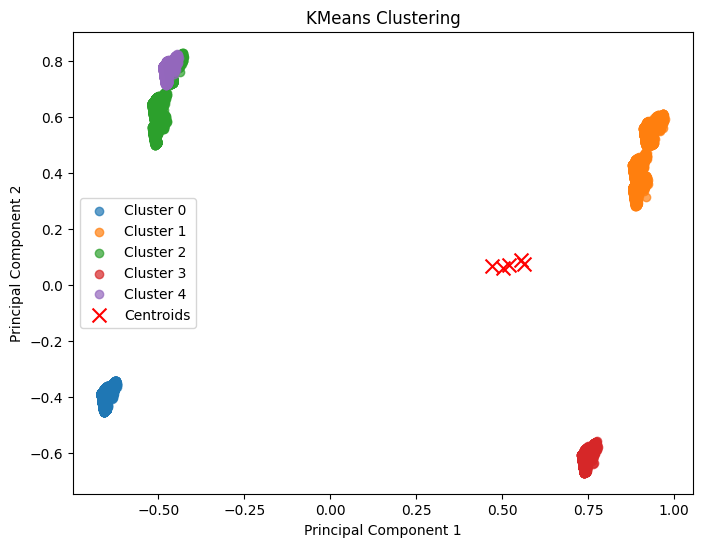

In [47]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
inertia = kmeans.inertia_

from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], label=f'Cluster {cluster}', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', label='Centroids', s=100)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')



#add centers to the plt
#plt.scatter(centers[:,0], centers[:,1], marker='x', s=150, c='r', label='centroids')
#plt.legend()
#plt.show()

